<h1 style="text-align: center;">MEMORIA EDA</h1>

<h3 style='text-align:center;'>Análisis exploratorio de datos sobre uso de redes sociales entre estudiantes</h3>

<p align="center">
  <img src="./img/redes_sociales_01.png" width="500">
</p>

## Introducción

En la era digital actual, las redes sociales se han convertido en un elemento central en la vida cotidiana de los estudiantes. Estas plataformas no solo facilitan la comunicación y el acceso a la información, sino que también pueden influir significativamente en su bienestar emocional, sus hábitos de sueño y su rendimiento académico.

El presente análisis utiliza un conjunto de datos disponible en **Kaggle**, enfocado en examinar los **patrones de uso de redes sociales y su relación con distintos aspectos de la vida estudiantil**, como el nivel de adicción, el estado de ánimo, las horas de descanso y las posibles consecuencias sociales derivadas del uso excesivo.

Mediante un **análisis exploratorio de datos (EDA)**, se busca comprender cómo varía el uso de las redes sociales entre diferentes grupos —por ejemplo, según el género o el estado sentimental— y detectar **tendencias y correlaciones relevantes** entre el tiempo de conexión y variables asociadas al bienestar personal.

En definitiva, este estudio pretende ofrecer una visión clara sobre el papel que desempeñan las redes sociales en la vida de los jóvenes y cómo su uso, moderado o excesivo, puede influir en su equilibrio psicológico y social.

**Fuente del dataset:** [Kaggle - Students Social Media Addiction Dataset](https://www.kaggle.com/code/davidmoronocores/student-s-social-media-addiction-analysis)


<p align="center">
  <img src="./img/redes_sociales_02.jpg" width="500">
</p>

## Preparación y exploración inicial de de datos

El dataset utilizado no ha requerido un proceso de limpieza exhaustivo, ya que el archivo original en formato CSV no contenía valores nulos ni registros duplicados que pudieran afectar la calidad del análisis.
Por este motivo, no fue necesario aplicar técnicas de eliminación de datos.

El tratamiento realizado se ha centrado únicamente en la preparación de los datos para su análisis exploratorio, lo que ha incluido la selección de columnas relevantes, la conversión de tipos de datos cuando ha sido  necesario y la creación de subconjuntos y dataframes específicos para el estudio de determinadas variables.

En el siguiente bloque de código se importan las librerias de Python necesarias.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # importa todos los warnings de versión y os ignora
import plotly.express as px
# Linea para ignorar los avisos
warnings.filterwarnings("ignore")

El dataset recoge información sobre estudiantes de distintos países y niveles académicos, con el objetivo de analizar la relación entre el **uso de redes sociales** y aspectos **académicos, personales y emocionales**.

En el bloque de código que sigue, se importa en forma de dataframe el set de datos en formato CSV que ha sido el objeto de este estudio. La visualización de los primeros registros del dataset nos dan ya una primera idea del tipo de variables con las que se tendrán que trabajar.

- **Identificación:**  
  - Student_ID → variable **única e identificadora**, sin valor analítico directo.  

- **Datos demográficos:**  
  - Age (Edad) → variable **numérica continua**.  
  - Gender, Academic_Level, Country (Género, Nivel académico y Pais) → variables **categóricas nominales**.  

- **Uso de redes sociales:**  
  - Avg_Daily_Usage_Hours (Horas diarias promedio de uso de redes sociales) → variable **numérica continua** .  
  - Most_Used_Platform (Plataformas más usadas) → variable **categórica nominal**.  

- **Impacto y bienestar:**  
  - Affects_Academic_Performance (Autopercepción del estudiante sobre si las horas que invierte en visitar redes sociales le afectan ensu rendimiento académico) → variable **categórica binaria** (Sí/No).  
  - Sleep_Hours_Per_Night (Número de horas de sueño) → **numérica continua**.  
  - Mental_Health_Score (Puntaje sobre salud menta) → **numérica ordinal** (escala subjetiva de bienestar).  

- **Aspectos sociales:**  
  - Relationship_Status (Estado sentimental) → **categórica nominal**.  
  - Conflicts_Over_Social_Media (Conflictos en redes sociales) → **numérica discreta** (número de conflictos).  
  - Addicted_Score (Puntaje de adicción a las redes sociales) → **numérica ordinal**, representa el nivel de adicción percibido.


In [3]:
social_media = pd.read_csv("Students_Social_Media_Addiction.csv", sep=",")
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


Al ejecutar social_media.info(), se obtiene un resumen técnico del dataset. Este en concreto contiene 705 registros y 13 columnas, sin valores nulos.


In [4]:
social_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

El análisis descriptivo de las variables numéricas del dataset indica que se cuenta con 705 registros de estudiantes, con edades comprendidas entre 18 y 24 años y un promedio aproximado de 20.7 años. Los demás valores de agregación proporcionados por el método describe() ofrecen una visión panorámica inicial de los datos, algunos de cuyos aspectos serán explorados en detalle durante el análisis exploratorio.


In [5]:
social_media.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## Análisis Exploratorio de Datos (EDA)

En esta sección se realiza un análisis exploratorio del dataset con el objetivo de identificar patrones, tendencias y posibles relaciones entre las variables estudiadas. Se utilizarán visualizaciones y estadísticas descriptivas para comprender mejor el comportamiento de los estudiantes en relación con el uso de redes sociales, su salud mental, rendimiento académico y hábitos de sueño.

Una primera aproximación a los datos parece pedir que se compruebe si existen diferencias según género en lo que a número de horas diarias dedicadas a las redes sociales por los estudiantes. Rapidamente se ve que la diferencia es mínima, pudiendose afirmar que tanto mujeres como hombres usan las redes sociales practicamente en la misma medida.

##### Preparación de datos: agrupación por género y función de agregación para obtener la media de horas de uso diario de redes sociales.

In [6]:
social_media.groupby("Gender")["Avg_Daily_Usage_Hours"].mean().reset_index()

,Gender,Avg_Daily_Usage_Hours
0,Female,5.011048
1,Male,4.826136


In [7]:
valores = social_media.groupby("Gender")["Avg_Daily_Usage_Hours"].mean()

valores.index = valores.index.map({"Male": "Hombres",
                                   "Female": "Mujeres"})

##### Gráfico resultante

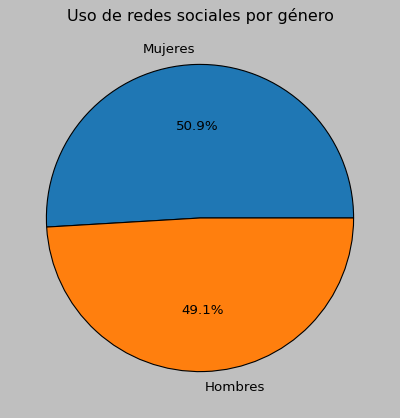

In [8]:
plt.style.use('classic')

plt.figure()

plt.pie(valores, labels=valores.index, autopct='%1.1f%%', colors = ["#1F77B4", "#FF7F0E"])

plt.title("Uso de redes sociales por género")

plt.show();

### Hipótesis 1: Relación entre tiempo de uso diario y rendimiento académico

En este punto se pretende comprobar que los Los estudiantes que reportan un mayor promedio de horas diarias en redes sociales tienen más probabilidades de que su rendimiento académico se vea afectado según su propia autopercepción.

Variables utilizadas: Avg_Daily_Usage_Hours, Affects_Academic_Performance.

In [9]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


#### Gráfico 1

##### Preparación de datos: agrupación por afectación de rendimiento académico y función de agregación para obtener la media de horas de uso diario de redes sociales.

In [10]:
# MEDIA
df_media_horas = round(social_media.groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean().reset_index(), 1)

##### Gráfico resultante

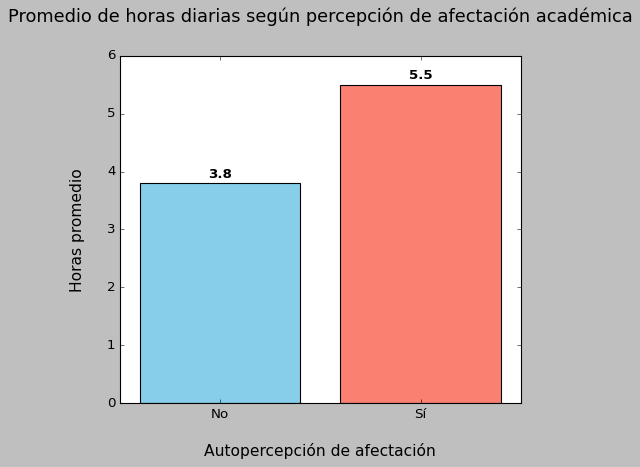

In [11]:
plt.figure(figsize=(6,6))

plt.bar(df_media_horas['Affects_Academic_Performance'], df_media_horas['Avg_Daily_Usage_Hours'], color=['skyblue', 'salmon'] )

plt.title("Promedio de horas diarias según percepción de afectación académica", pad=30, fontsize=16)
plt.xlabel("Autopercepción de afectación", labelpad=20, fontsize=14)
plt.ylabel("Horas promedio", labelpad=20, fontsize=14)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

plt.xticks([0, 1], ["No", "Sí"])

promedios = df_media_horas['Avg_Daily_Usage_Hours']

for indice, valor in enumerate(promedios):
    plt.text(indice, valor + 0.1, f"{valor}", ha='center', fontweight='bold')

plt.xlim(-0.5, len(df_media_horas['Affects_Academic_Performance']) - 0.5)
plt.tight_layout()
plt.show()

##### Conclusión:

Aunque parece existir cierta correlación entre las horas que los estudiantes dedican a las redes sociales y la percepción de si esto afecta su rendimiento académico, también observamos que la diferencia en la cantidad de horas entre quienes reconocen un efecto y quienes no lo reconocen no es excesiva. Dado que esta correlación involucra una variable subjetiva —es decir, basada en la percepción del estudiante y no en datos objetivos—, es posible que algunos estudiantes tengan una visión distorsionada de su propia realidad.

Un análisis más exhaustivo de este fenómeno se realiza en el siguiente gráfico de dispersión, donde se podrán observar matices interesantes que enriquecen la interpretación inicial de esta relación.

## Gráfico 2

##### Preparación de datos: 

1. Filtramos el dataframe para obtener el numero de horas de uso de redes sociales de:
    - Los hombres que dicen que SÍ les afecta en su rendimiento académico.
    - Los hombres que dicen que NO les afecta en su rendimiento académico.
    - Las mujeres que dicen que SÍ les afecta en su rendimiento académico.
    - Las mujeres que dicen que NO les afecta en su rendimiento académico.

In [12]:
hombres_yes = social_media[(social_media["Affects_Academic_Performance"] == "Yes") & (social_media["Gender"] == "Male")]['Avg_Daily_Usage_Hours']
hombres_no = social_media[(social_media["Affects_Academic_Performance"] == "No") & (social_media["Gender"] == "Male")]['Avg_Daily_Usage_Hours']
mujeres_yes = social_media[(social_media["Affects_Academic_Performance"] == "Yes") & (social_media["Gender"] == "Female")]['Avg_Daily_Usage_Hours']
mujeres_no = social_media[(social_media["Affects_Academic_Performance"] == "No") & (social_media["Gender"] == "Female")]['Avg_Daily_Usage_Hours']
print(len(hombres_yes))
print(len(hombres_no))
print(len(mujeres_yes))
print(len(mujeres_no))

222
130
231
122


2. Aquí preparamos los datos para el gráfico de dispersión, creando listas de valores y (horas de uso), asignando posiciones x en el eje horizontal para separar visualmente los grupos, y definiendo colores para cada combinación de género y percepción de afectación académica.

In [13]:
# Listas de y (valores reales)
lista_hombres_yes = list(hombres_yes)
lista_hombres_no = list(hombres_no)
lista_mujeres_yes = list(mujeres_yes)
lista_mujeres_no = list(mujeres_no)

# Listas de x (posición en el eje x)
x_hombres_no = [-0.1] * len(lista_hombres_no)
x_mujeres_no = [0.1] * len(lista_mujeres_no)
x_hombres_yes = [0.9] * len(lista_hombres_yes)
x_mujeres_yes = [1.1] * len(lista_mujeres_yes)

# Listas colores
colores_hombres_no = ["palegreen"] *len(lista_hombres_no)
colores_mujeres_no = ["lightsalmon"] *len(lista_mujeres_no)
colores_hombres_yes = ["palegreen"] *len(hombres_yes)
colores_mujeres_yes = ["lightsalmon"] *len(lista_mujeres_yes)

3. Aquí aplicamos un “jitter” a las posiciones en el eje x para cada grupo, es decir, agregamos un leve desplazamiento aleatorio para evitar que los puntos correspondientes a los valores de las horas se solapen en el gráfico de dispersión, mejorando la visualización. Como el rangpo en el que se mueven los valores es pequeño, muchos de ellos se solaparían en el gráfico y la comprensión sería más difícil.

In [14]:
x_hombres_no_jitter = []

for i in x_hombres_no:
    i = i + np.random.uniform(-0.05, 0.05)
    x_hombres_no_jitter.append(i)

x_mujeres_no_jitter = []

for i in x_mujeres_no:
    i = i + np.random.uniform(-0.05, 0.05)
    x_mujeres_no_jitter.append(i)

x_hombres_yes_jitter = []

for i in x_hombres_yes:
    i = i + np.random.uniform(-0.05, 0.05)
    x_hombres_yes_jitter.append(i)

x_mujeres_yes_jitter = []

for i in x_mujeres_yes:
    i = i + np.random.uniform(-0.05, 0.05)
    x_mujeres_yes_jitter.append(i)

4. Concatenamos todas las listas de valores, posiciones y colores de los distintos grupos en tres listas completas (y_total, x_total y colores_total) para poder graficar todos los puntos de manera conjunta en un solo scatter plot.

In [15]:
y_total =  lista_hombres_no + lista_mujeres_no + lista_hombres_yes + lista_mujeres_yes
x_total = x_hombres_no_jitter + x_mujeres_no_jitter + x_hombres_yes_jitter + x_mujeres_yes_jitter
colores_total = colores_hombres_no + colores_mujeres_no + colores_hombres_yes + colores_mujeres_yes

5. Aquí calculamos las medias del promedio de horas diarias de uso de redes sociales para los estudiantes que perciben que esto sí les afecta y para los que perciben que no, sin tener en cuenta el género. Estos valores luego se utilizan para dibujar dos líneas horizontales sobre el gráfico de dispersión, representando visualmente la media de cada grupo.

In [16]:
media_yes = round(social_media[social_media["Affects_Academic_Performance"] == "Yes"].groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean().reset_index(), 1)
media_no = round(social_media[social_media["Affects_Academic_Performance"] == "No"].groupby("Affects_Academic_Performance")["Avg_Daily_Usage_Hours"].mean().reset_index(), 1)
y_media_yes = media_yes["Avg_Daily_Usage_Hours"].iloc[0]
y_media_no = media_no["Avg_Daily_Usage_Hours"].iloc[0]

5. Gráfico resultante.

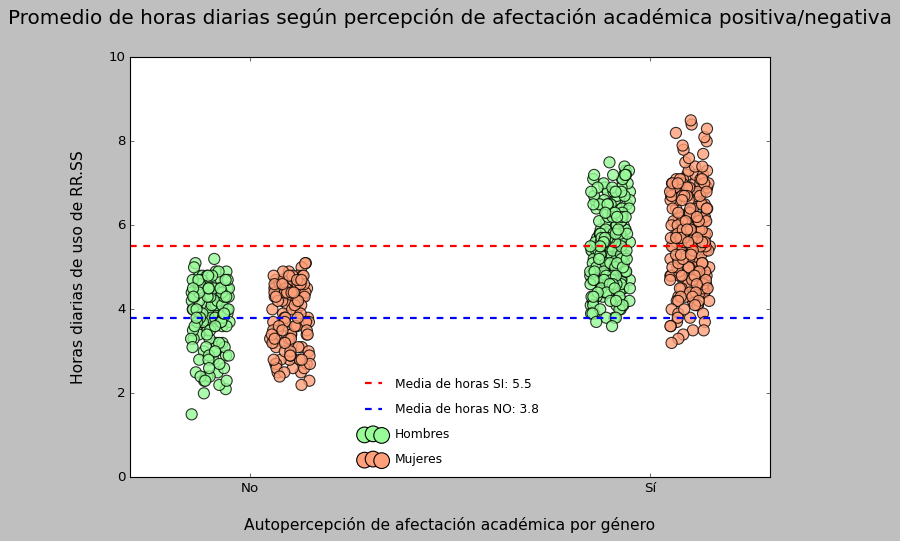

In [17]:
plt.figure(figsize=(10,7))

plt.axhline(y=y_media_yes, color='red', linestyle='--', linewidth=2, label='Media de horas SI: 5.5')
plt.axhline(y=y_media_no, color='blue', linestyle='--', linewidth=2, label='Media de horas NO: 3.8')

plt.scatter(x_total, y_total, c=colores_total, alpha=0.8, s=100)

plt.title("Promedio de horas diarias según percepción de afectación académica positiva/negativa", pad=30, fontsize=18)
plt.xlabel("Autopercepción de afectación académica por género", labelpad=20, fontsize=14)
plt.ylabel("Horas diarias de uso de RR.SS", labelpad=20, fontsize=14)
plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

p_hombres = plt.scatter([], [], c="palegreen", s=200, label="Hombres")
p_mujeres = plt.scatter([], [], c="lightsalmon", s=200, label="Mujeres")

plt.xticks([0, 1], ["No", "Sí"])
plt.xlim(-0.3, 1.3)
plt.ylim(0, 10)

plt.legend(frameon=False, loc="lower center", fontsize=11, labelspacing=1)

plt.show();

##### Conclusión:

Esta visualización nos permite tener una aproximación mas realista. Parece lógico pensar que todas las ocurrencias (puntos) que se salen fuera (por encima o por debajo) del área delimitada por las líneas de las medias se corresponden con estudiantes cuya percepción puede estar mas cercana a la su realidad. Es decir, tanto los estudiantes que afirman que su uso de redes sociales no afecta a su rendimiento académico y que reportan menos de 4 horas de uso diario como los que afirman que si les afecta y reportan más de 6 horas concuerdan con lo que sería lógico pensar en un sentido o en otro. 

Es en tos extremos en los que quizas sí se pueda apreciar alguna diferencia respecto al genero: las ocurrencias más extremas, con mayor numero de horas de uso de redes sociales (mas de 8) y que podrían considerarse incluso outliers, pertenecen todas a mujeres. Aunque no se trata de algo exagerado, puede pensarse que esta circunstancia es que marcaba la leve diferencia entre géneros revelada en el gráfico circular del inicio, del estudio.

Las ocurrencias que caen en el área delimitada por las líneas de las medias son las que presentan, podría decirse, menor fiabilidad en su autopercepción. En la parte del "no" observamos muchos estudiantes que, aunque se euncuentra muy cerca de la media del "sí", han contestado que las horas que ocupan en las redes sociales no les afectan en su rendimiento académico. Al otro lado, por el contrario, muchas ocurrencias del "sí" se acercan a la línea de la media del "no", lo que nos vuelve a hacer pensar en una autopercepción quizas no demasiado acertada (o exagerada) en lo que a afectación del rendimiento académico se refiere.

En conclusion, la mayoría de los estudiantes se agrupa alrededor de las medias, lo que sugiere que, en general, la percepción de afectación académica sigue un patrón lógico con respecto al tiempo de uso de redes sociales.

Se da una variabilidad notable dentro de cada grupo. Aunque las medias diferencian los grupos, hay una dispersión importante dentro de cada categoría. Esto podría indicar que factores individuales (como hábitos de estudio, motivación, y manejo del tiempo) podrían influir en cómo el uso de redes sociales afecta el rendimiento.

## Gráfico 3

##### Preparación de datos: 

1. Agrupación por afectación de rendimiento académico y nivel académico para obtener la media de horas de uso diario de redes sociales.

In [18]:
medias_niv_acad = social_media.groupby(["Affects_Academic_Performance", "Academic_Level"])["Avg_Daily_Usage_Hours"].mean().reset_index()
medias_niv_acad

,Affects_Academic_Performance,Academic_Level,Avg_Daily_Usage_Hours
0,No,Graduate,3.723016
1,No,High School,3.500000
2,No,Undergraduate,3.891935
3,Yes,Graduate,5.444221
4,Yes,High School,5.708000
5,Yes,Undergraduate,5.602183


2. Convertimos los valores "Yes"/"No" de la columna Affects_Academic_Performance en 1 y 0, y los guardamoa en una nueva columna Conv.

In [19]:
dict_mapeo = {"No": 0, "Yes": 1}
medias_niv_acad["Conv"] = medias_niv_acad["Affects_Academic_Performance"].map(dict_mapeo)
medias_niv_acad

,Affects_Academic_Performance,Academic_Level,Avg_Daily_Usage_Hours,Conv
0,No,Graduate,3.723016,0
1,No,High School,3.500000,0
2,No,Undergraduate,3.891935,0
3,Yes,Graduate,5.444221,1
4,Yes,High School,5.708000,1
5,Yes,Undergraduate,5.602183,1


3. Sacamos un array con los nombres de los niveles académicos.

In [20]:
niveles = medias_niv_acad['Academic_Level'].unique()
niveles

array(['Graduate', 'High School', 'Undergraduate'], dtype=object)

4. Gráfico resultante.

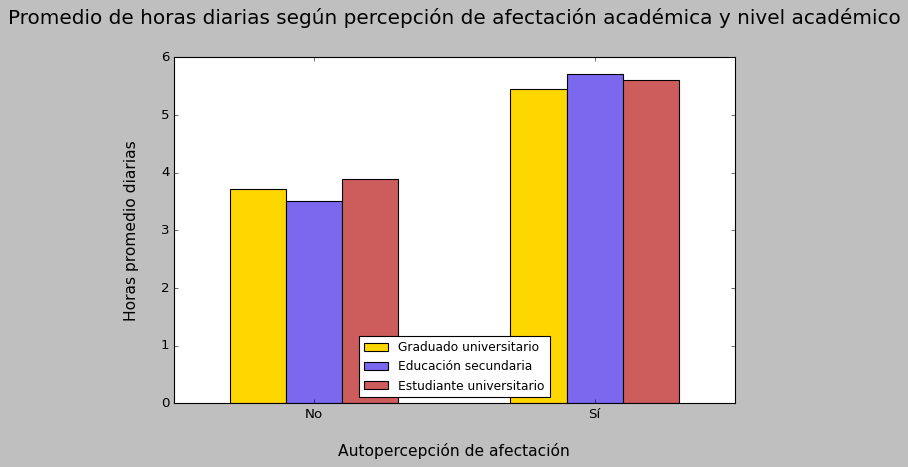

In [21]:
plt.figure(figsize=(8,6))

color = ['gold', 'mediumslateblue', 'indianred']
ancho = 0.2

for i, nivel in enumerate(niveles):
    df_nivel = medias_niv_acad[medias_niv_acad['Academic_Level'] == nivel]
    desplazamiento = (i - 1) * ancho   
    x = df_nivel['Conv'] + desplazamiento
    if nivel == "Graduate":
        nivel = "Graduado universitario"
    elif nivel == "Undergraduate":
        nivel = "Estudiante universitario"
    else:
        nivel = "Educación secundaria"
    plt.bar(x, df_nivel['Avg_Daily_Usage_Hours'], width=ancho, color=color[i], label = nivel)

plt.xticks([0, 1], ["No", "Sí"])

plt.title("Promedio de horas diarias según percepción de afectación académica y nivel académico", pad=30, fontsize=18)
plt.xlabel("Autopercepción de afectación", labelpad=20, fontsize=14)
plt.ylabel("Horas promedio diarias", labelpad=20, fontsize=14)

plt.subplots_adjust(left=0.15, right=0.95, top=0.9, bottom=0.15)

plt.xlim(-0.5, len(df_media_horas['Affects_Academic_Performance']) - 0.5)
plt.legend(frameon=True, loc="lower center", fontsize=11, labelspacing=0.5)

plt.tight_layout()
plt.show();

##### Conclusión:

Este gráfico no muestra diferencias destacables en la autopercepción de afecttación al rendimiento si se desglosa por nivel académico. En los 3 casos el número de horas en redes sociales para estas 3 categorías es muy similar, tanto en el caso de estudiantes que niegan afectación como en el caso de los que la reconocen.

### Hipótesis 2: Influencia de la plataforma más utilizada en el puntaje de adicción

Se pretende comprobaar si los estudiantes que usan las plataformas más populares tienen puntajes de adicción más altos que los que usan redes sociales menos visitadas. 

Variables utilizadas: Most_Used_Platform, Addicted_Score

## Gráfico 1

##### Preparación de datos: 

1. Diccionario que asocia a cada plataforma (clave) su color caracteristico (valor).

In [22]:
palette_plataformas = {'Instagram': '#E1306C',
                       'Twitter': '#1DA1F2',
                       'TikTok': '#000000',
                       'YouTube': '#FF0000',
                       'Facebook': '#1877F2',
                       'LinkedIn': '#0077B5',
                       'Snapchat': '#FFFC00',
                       'LINE': '#00C300',
                       'KakaoTalk': '#F7C325',
                       'VKontakte': '#4C75A3',
                       'WhatsApp': '#25D366',
                       'WeChat': '#09B83E'}

2. Sacamos una Serie con las plataformas ordenadas por ocurrencias y generamos una lista de colores correspondiente a cada plataforma según el diccionario.

In [23]:
redes_sociales = social_media["Most_Used_Platform"].value_counts()
colores = [palette_plataformas[plataforma] for plataforma in redes_sociales.index]

4. Gráfico resultante.

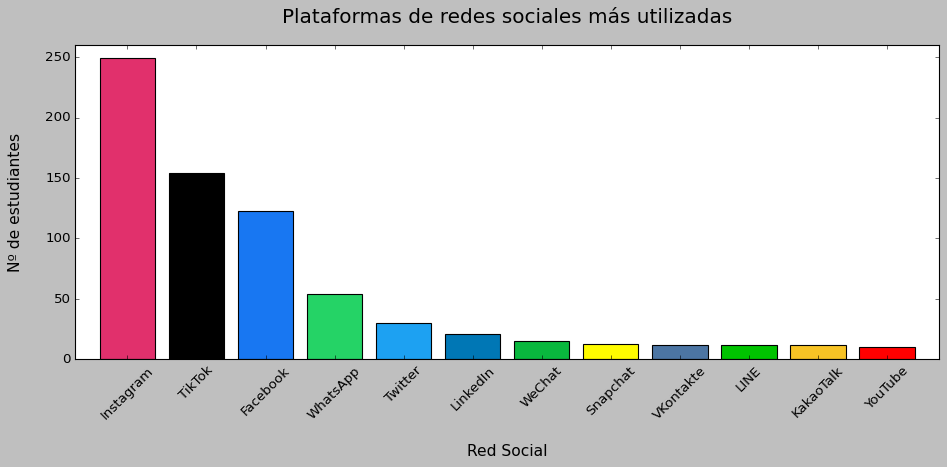

In [24]:
plt.figure(figsize=(12,6))

plt.bar(redes_sociales.index, redes_sociales.values, color=colores)

plt.title("Plataformas de redes sociales más utilizadas", pad=20, fontsize=18)
plt.xlabel("Red Social", labelpad=20, fontsize=14)
plt.ylabel("Nº de estudiantes", labelpad=20, fontsize=14)

plt.xticks(rotation=45)

plt.ylim(0, 260)
plt.margins(x=0.03)

plt.tight_layout()

plt.show();

## Gráfico 2

In [25]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [26]:
social_media["Most_Used_Platform"].unique()

array(['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook',
       'LinkedIn', 'Snapchat', 'LINE', 'KakaoTalk', 'VKontakte',
       'WhatsApp', 'WeChat'], dtype=object)

##### Preparación de datos: 

1. Agrupación por plataforma y función de agregación para obtener la media del puntaje de adicción para cada una de ellas.

In [27]:
avg_score = social_media.groupby("Most_Used_Platform")["Addicted_Score"].mean().reset_index()
avg_score

,Most_Used_Platform,Addicted_Score
0,Facebook,5.666667
1,Instagram,6.554217
2,KakaoTalk,6.000000
3,LINE,3.000000
4,LinkedIn,3.809524
5,Snapchat,7.461538
6,TikTok,7.428571
7,Twitter,5.500000
8,VKontakte,5.000000
9,WeChat,6.066667


2. Variable para sacar el mismo orden descendente según plataforma más usada del gráfico anterior

In [28]:
redes_sociales = social_media["Most_Used_Platform"].value_counts()
orden = redes_sociales.index

3. Gráfico resultante.

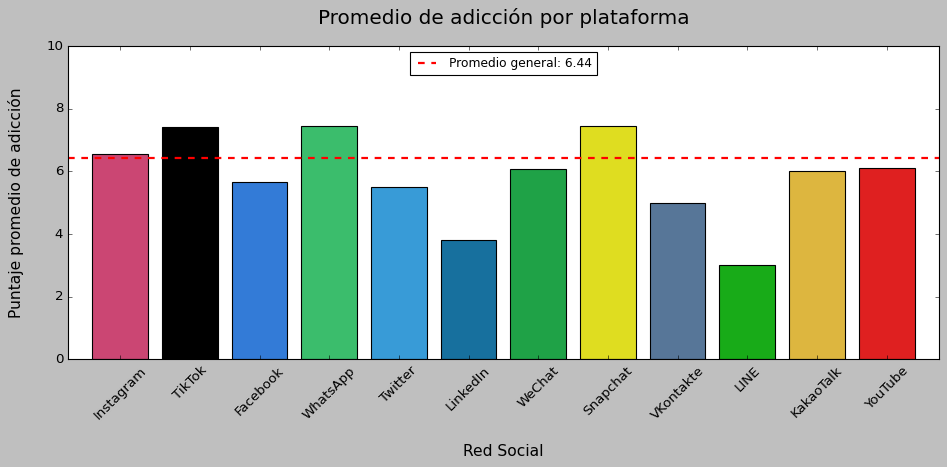

In [29]:
plt.figure(figsize=(12,6))

sns.barplot(data=social_media, x="Most_Used_Platform", y="Addicted_Score", order=orden, palette=palette_plataformas, ci=None)

y_promedio = social_media["Addicted_Score"].mean()
plt.axhline(y=y_promedio, color="red", linestyle="--", linewidth=2, label=f"Promedio general: {y_promedio:.2f}")

plt.title("Promedio de adicción por plataforma", pad=20, fontsize=18)
plt.xlabel("Red Social", labelpad=20, fontsize=14)
plt.ylabel("Puntaje promedio de adicción", labelpad=20, fontsize=14)

plt.xticks(rotation=45)
plt.ylim(0, 10)
plt.margins(x=0.03)

plt.tight_layout()

plt.legend(frameon=True, loc="upper center", fontsize=11, labelspacing=0.5)

plt.show();

##### Conclusión:

Este gráfico desmiente que las plataformas más usadas sean las que más adicción provocan. Si bien es cierto que 3 de las 4 primeras plataformas superan la media general de adicción (Instagram, TikTok y Whatsapp), también vemos que plaformas mucho menos usadas (Snapchat) superan también esa media o están muy cerca (Kakaotalk y Youtube).

### Hipótesis 3: Relación salud mental y adicción a redes sociales

Se pretende comprobar si a mayor tiempo de uso de redes sociales, mayor es la probabilidad de presentar síntomas de deterioro en la salud mental y la escasez de horas de sueño.

Variables utilizadas: Addicted_Score, Mental_Health_Score, Sleep_Hours_Per_Night

## Gráfico 1

El gráfico de correlaciones entre las variables numéricas del dataframe objeto de estudio muestra una fuerte correlación negativa entre la variable del puntaje de adiccion y la del puntaje de salud mental. Igualmente la variable correpondiente a las horas dormidas por noche, aunque algo menos, presenta otra notable correlacion negativa con el puntaje de adiccón. La alta correlación positiva entre la variable del puntaje de la salud mental y el numero de horas dormidas por noche, nos hace pensar en posibles relaciones causa-efecto entre las 3.

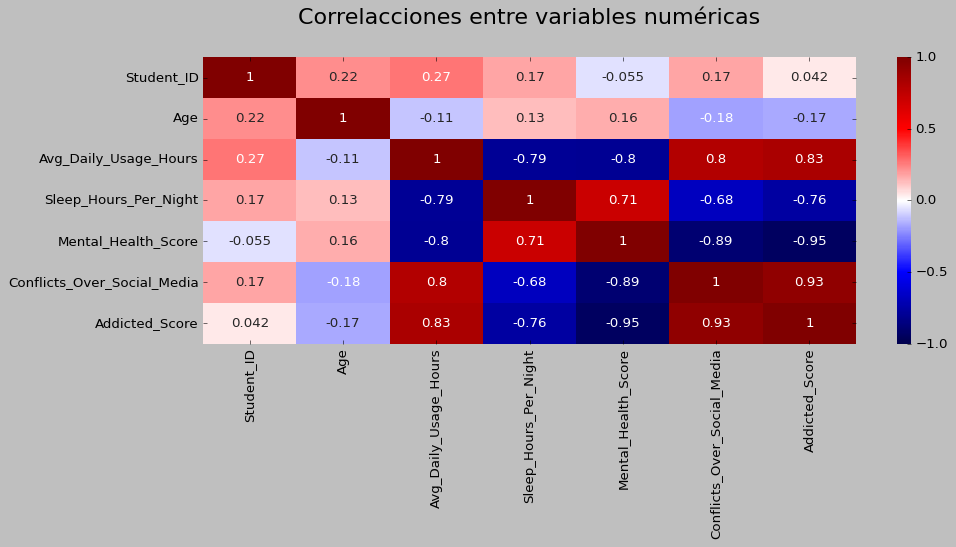

In [ ]:
plt.figure(figsize=(13,7))

sns.heatmap(social_media.corr(numeric_only=True), 
            annot=True, 
            cmap="seismic", 
            vmin=-1)

plt.title("Correlacciones entre variables numéricas", pad=30, fontsize=20)

plt.tight_layout()

plt.show();

## Gráfico 2

##### Preparación de datos: 

1. Creación de dataframe a partir de las variables que interesan.

In [ ]:
df_salud_adiccion_sueno = social_media[["Addicted_Score", "Mental_Health_Score", "Sleep_Hours_Per_Night"]]
df_salud_adiccion_sueno

,Addicted_Score,Mental_Health_Score,Sleep_Hours_Per_Night
0,8,6,6.5
1,3,8,7.5
2,9,5,5.0
3,4,7,7.0
4,7,6,6.0
...,...,...,...
700,5,7,7.2
701,9,4,5.9
702,7,6,6.7
703,4,8,7.5


2. Gráfico resultante.

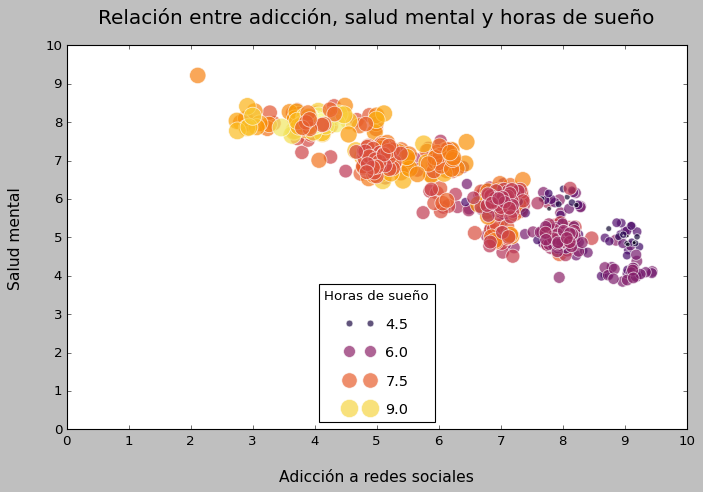

In [ ]:
plt.figure(figsize=(10,6))

df_salud_adiccion_sueno['Addicted_Jitter'] = df_salud_adiccion_sueno['Addicted_Score'] + np.random.normal(0, 0.2, len(df_salud_adiccion_sueno))
df_salud_adiccion_sueno['Mental_Jitter'] = df_salud_adiccion_sueno['Mental_Health_Score'] + np.random.normal(0, 0.2, len(df_salud_adiccion_sueno))

sns.scatterplot(x='Addicted_Jitter',
                y='Mental_Jitter',
                hue='Sleep_Hours_Per_Night',     
                size='Sleep_Hours_Per_Night',    
                sizes=(1, 300),
                palette='inferno',
                alpha=0.7,
                data=df_salud_adiccion_sueno)

plt.xlabel('Adicción a redes sociales', labelpad=20, fontsize=14)
plt.ylabel('Salud mental', labelpad=20, fontsize=14)

plt.xlim(0, 10)
plt.xlim(0, 10)

plt.xticks(range(0, 11, 1))
plt.yticks(range(0, 11, 1))

plt.title('Relación entre adicción, salud mental y horas de sueño', pad=20, fontsize=18)

plt.legend(frameon=True, loc="lower center", fontsize=13, labelspacing=1, title="Horas de sueño" )

plt.show();

##### Conclusión:

Este gráfico de dispersión confirma las sospechas que se levantaban en el gráfico de las correlaciones: a mayor adicción a las redes sociales, menor número de horas de sueño y menor puntaje en lo que a salud mental se refiere. Las 3 variables están interrelacionadas entre sí y permiten afirmar que, en general una mayor adicción a las redes sociales tiene efectos negativos en el bienestar y la salud de los estudiantes que la padecen.

# Hipótesis 4: Relación entre estado sentimental, horas de uso de redes sociales y grado de adiccion

Se pretende demostra que los estudiantes solteros o en una relación complicada son los que dedicanr un mayor promedio de horas diarias en redes sociales.

Variables: Avg_Daily_Usage_Hours, Relationship_Status, Addicted_Score.

In [51]:
social_media.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


##### Preparación de datos: 

1. Creación de dataframe a partir de las variables que interesan.

In [57]:
df_relaciones = social_media[["Avg_Daily_Usage_Hours", "Addicted_Score", "Relationship_Status"]]
df_relaciones

,Avg_Daily_Usage_Hours,Addicted_Score,Relationship_Status
0,5.2,8,In Relationship
1,2.1,3,Single
2,6.0,9,Complicated
3,3.0,4,Single
4,4.5,7,In Relationship
...,...,...,...
700,4.7,5,In Relationship
701,6.8,9,Single
702,5.6,7,In Relationship
703,4.3,4,Single


2. Agrupación por estado sentimental y función de agregación para sacar la media horas diarias de uso de redes sociales por cada una de sus categorias.

In [58]:
df_relaciones_horas = df_relaciones.groupby("Relationship_Status")["Avg_Daily_Usage_Hours"].mean().reset_index()
df_relaciones_horas

,Relationship_Status,Avg_Daily_Usage_Hours
0,Complicated,4.721875
1,In Relationship,4.930796
2,Single,4.926042


3. Agrupación por estado sentimental y función de agregación para sacar la media puntaje de adicción por cada una de sus categorias.

In [59]:
df_relaciones_adiccion = df_relaciones.groupby("Relationship_Status")["Addicted_Score"].mean().reset_index()
df_relaciones_adiccion

,Relationship_Status,Addicted_Score
0,Complicated,7.031250
1,In Relationship,6.342561
2,Single,6.458333


4. Merge de los dos datagramas anteriores para graficar.

In [60]:
df_relaciones_horas_adiccion = pd.merge(df_relaciones_horas, df_relaciones_adiccion).reset_index(drop=True)
df_relaciones_horas_adiccion

,Relationship_Status,Avg_Daily_Usage_Hours,Addicted_Score
0,Complicated,4.721875,7.031250
1,In Relationship,4.930796,6.342561
2,Single,4.926042,6.458333


5. Gráfico resultante.

In [62]:
df_melted = df_relaciones_horas_adiccion.melt(
    id_vars='Relationship_Status',
    value_vars=['Avg_Daily_Usage_Hours', 'Addicted_Score'],
    var_name='Variable',
    value_name='Valor'
)

df_melted['Variable'] = df_melted['Variable'].replace({
    'Avg_Daily_Usage_Hours': 'Horas diarias de uso',
    'Addicted_Score': 'Nivel de adicción'
})

fig = px.bar(df_melted,
             x='Relationship_Status',
             y='Valor',
             color='Variable',
             barmode='group',
             title='Relación entre horas de uso y adicción según estado sentimental',
             text=None,
             color_discrete_sequence=['#1f77b4', '#ff7f0e'],
             labels={'Relationship_Status': 'Estado sentimental',
                     'Valor': 'Promedio',
                     'Variable': 'Indicador'})

fig.update_layout(template='plotly_white',
                  xaxis_title='Estado sentimental',
                  yaxis_title='Escala de promedios',
                  legend_title='Indicador',
                  yaxis=dict(range=[0, 10]))

fig.show()


##### Conclusión:

Se confirma parcialmente la hipotesis inicial. Si bien el promedio de horas diarias en redes sociales es muy similar en las 3 categorías de estado sentimeenta, sí se observa que la media de adicción despunta en el caso de los estudiantes con relaciones complicadas. Llama la atención de la paridad entre los estudiantes solteros y los que tienen pareja, ya que a priori podría pensarse que los solteros deberían presentar medias más elevadas.